## GeoSpatial Data Project

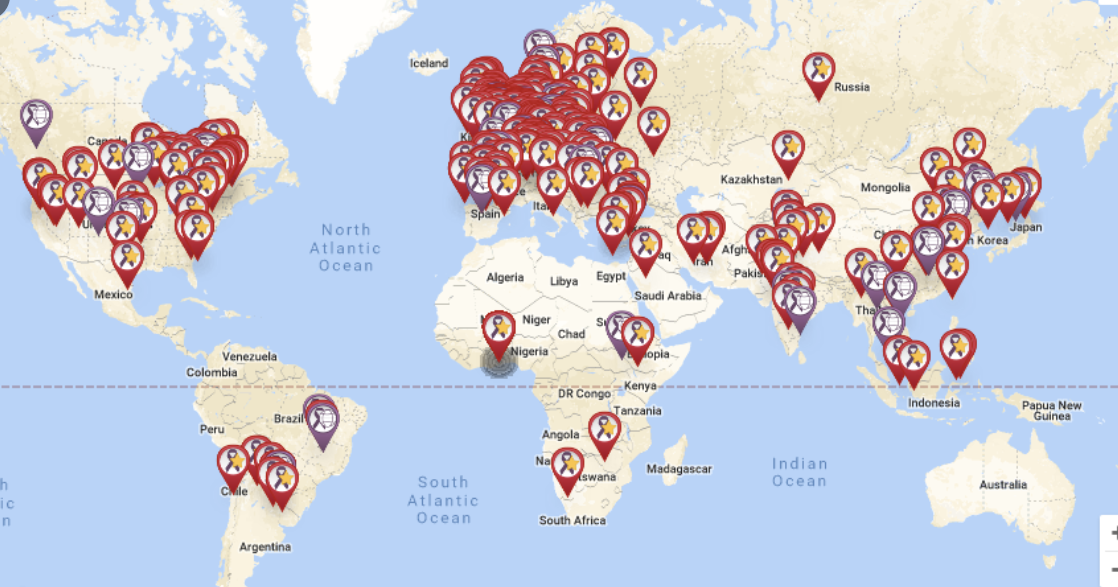

### Libraries

In [1]:
import pandas as pd
import re
import numpy as np
import scr.limpieza as l
from pymongo import MongoClient

### Conection with Mongo

In [17]:
conn = MongoClient("localhost:27017")
db = conn.get_database("ironhack")
db.list_collection_names()
companies = db.get_collection("companies")

In [18]:
companies

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ironhack'), 'companies')

Find the companies that:
- `Are related with the design`
- `Are games companies`

In [19]:
# I filtered the companies based in the two conditions
condition1 = {'$and':[{"tag_list" : {'$regex':'design'}}, {"tag_list" : {'$regex':'^fashion'}}, {"tag_list" : {'$regex':'^interior'}}]}
condition2 = {'$and': [{"category_code": "games_video"}]}
# I did a proj because I just want the information about the name, city, latitude and longitude.
proj = {'name': 1, '_id': 0, 'offices.latitude': 1, 'offices.longitude': 1, 'offices.zip_code': 1, 'offices.city': 1}
filtered = list(companies.find({'$or' : [condition1, condition2]}, proj))

In [20]:
filtered[0]

{'name': 'Flektor',
 'offices': [{'zip_code': '90232',
   'city': 'Culver City',
   'latitude': 34.025958,
   'longitude': -118.379768}]}

In [21]:
#We can appreciate that there are some companies that don't have location
f = pd.DataFrame(filtered)
f.offices

0       [{'zip_code': '90232', 'city': 'Culver City', ...
1       [{'zip_code': '94301', 'city': 'Palo Alto', 'l...
2       [{'zip_code': '10011-6903', 'city': 'New York'...
3       [{'zip_code': '', 'city': 'London', 'latitude'...
4       [{'zip_code': None, 'city': None, 'latitude': ...
                              ...                        
1078                                                   []
1079    [{'zip_code': '', 'city': 'Dallas', 'latitude'...
1080    [{'zip_code': '11103', 'city': 'Astoria', 'lat...
1081    [{'zip_code': 'BC V6B 1H5', 'city': 'Vancouver...
1082    [{'zip_code': '1700', 'city': 'Lisbon', 'latit...
Name: offices, Length: 1083, dtype: object

In [11]:
filtered[0]['offices'][0]

{'zip_code': '90232',
 'city': 'Culver City',
 'latitude': 34.025958,
 'longitude': -118.379768}

In [24]:
name = []
zip_code = []
latitude = []
longitude = []
city = []
for i in filtered:
    name.append(i['name'])
    try: 
        if i['offices'][0]['city'] == '':
            city.append(np.nan)
        else:
            city.append(i['offices'][0]['city'])
        if i['offices'][0]['zip_code'] == '':
            zip_code.append(np.nan)
        else:
            zip_code.append(i['offices'][0]['zip_code'])
        latitude.append(i['offices'][0]['latitude'])
        longitude.append(i['offices'][0]['longitude'])
    except:
        city.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        zip_code.append(np.nan)

In [29]:
d = {'company_name' : name, 'city' : city, 'latitude' : latitude, 'longitude': longitude, 'zip_code' : zip_code}

In [27]:
#Converse the Dictionary in DF
df_from_companies = pd.DataFrame.from_dict(d, orient='columns')
df_from_companies

,company_name,city,latitude,longitude,zip_code
0,Flektor,Culver City,34.025958,-118.379768,90232
1,Lala,Palo Alto,37.451151,-122.154369,94301
2,Joost,New York,40.746497,-74.009447,10011-6903
3,Babelgum,London,53.344104,-6.267494,NaN
4,Sparter,None,37.090240,-95.712891,None
...,...,...,...,...,...
1078,Symposium Productions,NaN,NaN,NaN,NaN
1079,Rev Media,Dallas,NaN,NaN,NaN
1080,Fictionaut,Astoria,40.759795,-73.916127,11103
1081,Tiny Speck,Vancouver,49.282455,-123.109217,BC V6B 1H5


In [33]:
#I choose those cities that are sin EEUU
df_from_companies.city.value_counts()

New York         70
San Francisco    58
London           28
Los Angeles      27
Palo Alto        16
                 ..
MontrÃ©al         1
Bournemouth       1
Omaha             1
El Segundo        1
BodÃ¸             1
Name: city, Length: 328, dtype: int64

In [35]:
list_ = ['New York', 'San Francisco', 'Los Angeles']
df = l.create(df_from_companies,'city',list_)

In [36]:
df_copy = df.copy()
df_copy.dropna(axis = 0, how = "any", inplace= True)
df_copy

,company_name,city,latitude,longitude,zip_code
2,Joost,New York,40.746497,-74.009447,10011-6903
5,Kyte,San Francisco,37.788482,-122.409173,94102
8,Stickam,Los Angeles,34.051409,-118.254558,90071
10,Livestream,New York,40.726155,-73.995625,10011
11,Ustream,San Francisco,37.392936,-122.079480,94107
...,...,...,...,...,...
1040,Exent,New York,40.752380,-74.005568,10001
1043,Mondo Media,San Francisco,37.764169,-122.402021,94103
1065,Film Annex,New York,40.746497,-74.009447,10011
1067,FremantleMedia Ventures,New York,40.743945,-73.985542,10016


In [37]:
df_copy.reset_index(drop=True,inplace=True)
df_copy.drop_duplicates(inplace=True)

In [38]:
df_copy.to_csv("dataset/df.csv", index=False)